In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [26]:
data = {
    'Study_Hours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Exam_Score': [50, 65, 75, 80, 85, 88, 89, 88, 85, 80]
}
df = pd.DataFrame(data)
df.head()

,Study_Hours,Exam_Score
0,1,50
1,2,65
2,3,75
3,4,80
4,5,85


In [28]:
X = df[['Study_Hours']]
y = df['Exam_Score']
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_lin = lin_reg.predict(X)
linear_model = LinearRegression()
linear_model.fit(X, y)
linear_pred = linear_model.predict(X)

In [30]:
degree = 3
poly_conv = PolynomialFeatures(degree=degree)
X_poly = poly_conv.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
poly_pred = poly_model.predict(X_poly)

Graficar

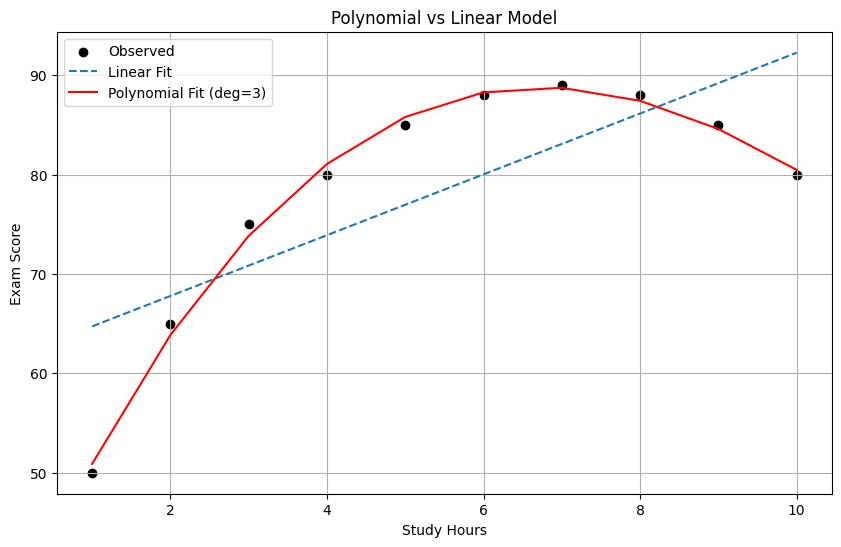

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black', label='Observed')
plt.plot(X, linear_pred, linestyle='--', label='Linear Fit')
plt.plot(X, poly_pred, color='red', label=f'Polynomial Fit (deg={degree})')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.title('Polynomial vs Linear Model')
plt.grid(True)
plt.legend()
plt.show()

In [32]:
mse_linear = mean_squared_error(y, linear_pred)
mse_poly = mean_squared_error(y, poly_pred)
print("MSE (Linear):", mse_linear)
print("MSE (Polynomial):", mse_poly)

MSE (Linear): 61.369696969696975
MSE (Polynomial): 0.6102564102564141


In [ ]:
coefs = poly_reg.coef_
intercept = poly_reg.intercept_
equation = f"y = {intercept:.3f}"
for i, c in enumerate(coefs[1:], start=1):
    equation += f" + ({c:.3f})x^{i}"

print("Polynomial equation:")
print(equation)

Polynomial equation:
y = 34.667 + (17.915)x^1 + (-1.741)x^2 + (0.041)x^3


Expontential regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
data = {
    'Date': pd.date_range(start='2022-01-01', periods=10),
    'Engaged_Users': [100, 150, 225, 338, 507, 761, 1142, 1713, 2570, 3855]
}

df = pd.DataFrame(data)
df

,Date,Engaged_Users
0,2022-01-01,100
1,2022-01-02,150
2,2022-01-03,225
3,2022-01-04,338
4,2022-01-05,507
5,2022-01-06,761
6,2022-01-07,1142
7,2022-01-08,1713
8,2022-01-09,2570
9,2022-01-10,3855


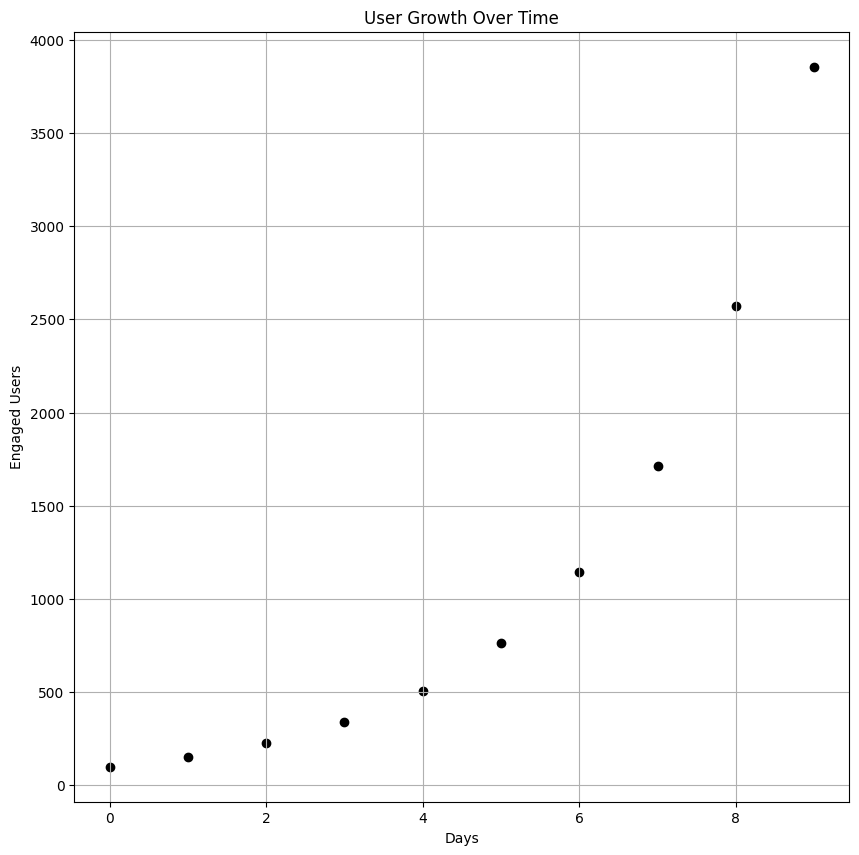

In [ ]:
df['Days'] = (df['Date'] - df['Date'].min()).dt.days
X = df[['Days']]
y = df['Engaged_Users']

plt.figure(figsize=(10, 10))
plt.scatter(X, y, color='black')
plt.xlabel("Days")
plt.ylabel("Engaged Users")
plt.title("User Growth Over Time")
plt.grid(True)
plt.show()

In [ ]:
lin = LinearRegression()
lin.fit(X, y)
y_pred_lin = lin.predict(X)
y_log = np.log(y)
exp_model = LinearRegression()
exp_model.fit(X, y_log)


y_pred_exp = np.exp(exp_model.predict(X))

In [ ]:
from sklearn.metrics import mean_squared_error
mse_lin = mean_squared_error(y, y_pred_lin)
mse_exp = mean_squared_error(y, y_pred_exp)

print("Linear MSE:", mse_lin)
print("Exponential MSE:", mse_exp)

Linear MSE: 261371.25333333333
Exponential MSE: 0.3845637617704857


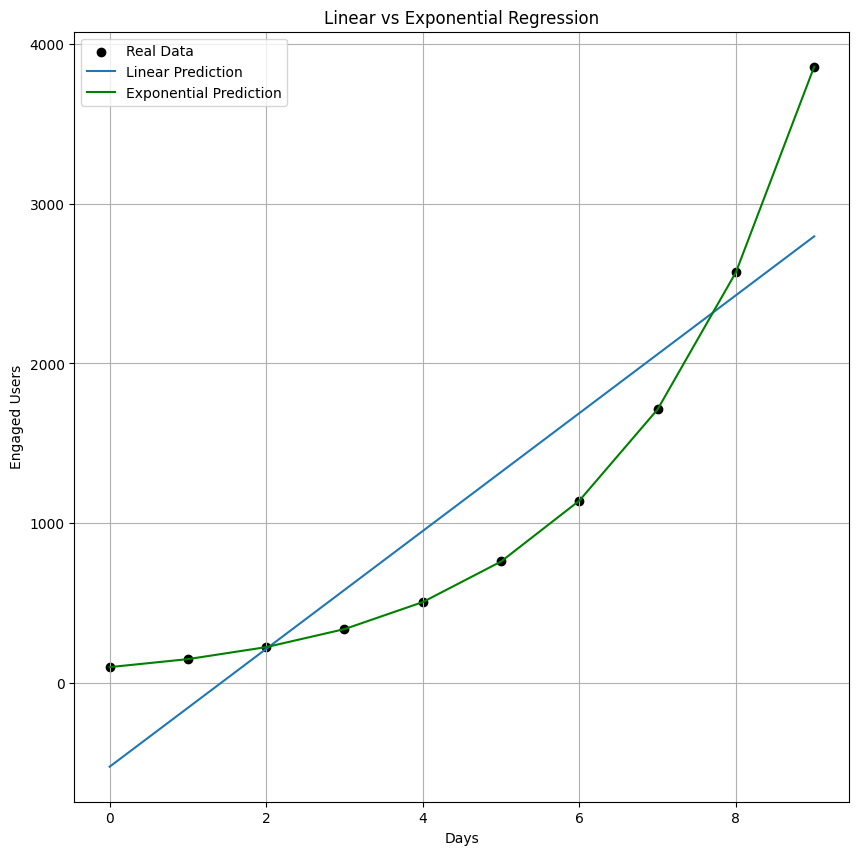

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(X, y, label="Real Data", color='black')
plt.plot(X, y_pred_lin, label="Linear Prediction")
plt.plot(X, y_pred_exp, label="Exponential Prediction", color='green')
plt.xlabel("Days")
plt.ylabel("Engaged Users")
plt.title("Linear vs Exponential Regression")
plt.legend()
plt.grid(True)
plt.show()

Power equation: Likes = 0.166 * Followers^1.984


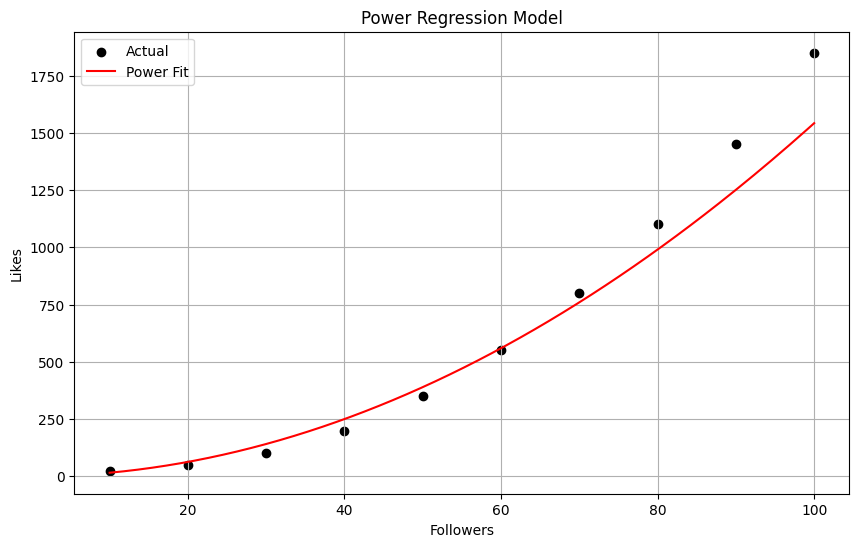

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
pw_df = pd.DataFrame({
    'Followers': np.arange(10, 110, 10),
    'Likes': [25, 50, 100, 200, 350, 550, 800, 1100, 1450, 1850]
})
X_pw_log = np.log(pw_df[['Followers']])
y_pw_log = np.log(pw_df[['Likes']])
power_reg = LinearRegression()
power_reg.fit(X_pw_log, y_pw_log)
b_coef = power_reg.coef_[0][0]
a_coef = np.exp(power_reg.intercept_[0])

print(f"Power equation: Likes = {a_coef:.3f} * Followers^{b_coef:.3f}")
followers_seq = np.linspace(pw_df['Followers'].min(), pw_df['Followers'].max(), 200)
predicted_likes = a_coef * np.power(followers_seq, b_coef)
plt.figure(figsize=(10, 6))
plt.scatter(pw_df['Followers'], pw_df['Likes'], color='black', label='Actual')
plt.plot(followers_seq, predicted_likes, color='red', label='Power Fit')
plt.xlabel('Followers')
plt.ylabel('Likes')
plt.title('Power Regression Model')
plt.legend()
plt.grid(True)
plt.show()